<a href="https://colab.research.google.com/github/alina-nnnn/Machine_learning/blob/main/%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Разработка модели классификации изображений цветов на основе нейронных сетей.**




## Импорт необходимых библиотек


In [ ]:
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from PIL import Image
from keras.utils import np_utils
import keras.utils as image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras import Sequential

## Загрузка и подготовка данных

*Загружаем набор данных с Google-диска*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Копируем набор данных из Google-Диск в Google-Colab
!cp '/content/drive/MyDrive/flowers.zip' flowers.zip

In [ ]:
# Проверяем, скопировался ли набор данных
!ls

drive  flowers.zip  sample_data


In [ ]:
# Распакуем zip-архив
!unzip flowers.zip

Archive:  flowers.zip
   creating: flowers/Lotus/
  inflating: flowers/Lotus/0312374e42.jpg  
  inflating: flowers/Lotus/04450f2d2e.jpg  
  inflating: flowers/Lotus/05266c0057.jpg  
  inflating: flowers/Lotus/054838fbb0.jpg  
  inflating: flowers/Lotus/07008525a7.jpg  
  inflating: flowers/Lotus/09504f1c96.jpg  
  inflating: flowers/Lotus/10012f282d.jpg  
  inflating: flowers/Lotus/11373f6206.jpg  
  inflating: flowers/Lotus/11829680cc.jpg  
  inflating: flowers/Lotus/118677892b.jpg  
  inflating: flowers/Lotus/12229788db.jpg  
  inflating: flowers/Lotus/1334999611.jpg  
  inflating: flowers/Lotus/15092e529e.jpg  
  inflating: flowers/Lotus/16474f6557.jpg  
  inflating: flowers/Lotus/168021e8e7.jpg  
  inflating: flowers/Lotus/1690129ab6.jpg  
  inflating: flowers/Lotus/16905dde87.jpg  
  inflating: flowers/Lotus/1897734ce7.jpg  
  inflating: flowers/Lotus/197529bcd3.jpg  
  inflating: flowers/Lotus/224849686c.jpg  
  inflating: flowers/Lotus/22575e98bb.jpg  
  inflating: flowers/Lotus

*В переменные запишем списки файлов директорий "Лотос" и "Подсолнух" из нашего набора данных.*



In [ ]:
lotus = os.listdir('/content/flowers/Lotus')
sunflower = os.listdir('/content/flowers/Sunflower')

In [ ]:
print(lotus)
print(sunflower)

['bf4527eb22.jpg', 'f19bf4df5d.jpg', 'f11a48ce08.jpg', '836674b9c6.jpg', 'bfbb60a9db.jpg', 'c6b0a59168.jpg', 'c06ec02648.jpg', 'ad7391e5e3.jpg', 'b27d503ebc.jpg', 'bfe5d3a42d.jpg', 'f8179dd4fc.jpg', 'd4b829cc27.jpg', 'e90a460b94.jpg', '118677892b.jpg', 'b991008eae.jpg', 'd387c6a921.jpg', 'a5e3886b77.jpg', '10012f282d.jpg', 'b9117400e5.jpg', 'f57b3b63f2.jpg', 'edcbaae34a.jpg', '62744cfc5a.jpg', 'cb89b575b2.jpg', 'd200a292d8.jpg', 'cd98f4acd1.jpg', 'b63b69d658.jpg', 'af79cfa8e9.jpg', 'eb17213ced.jpg', 'e4e736e9ef.jpg', 'b79f162271.jpg', 'f1aa92b89b.jpg', 'd79732e736.jpg', 'f2fc26a953.jpg', 'b86f6c748d.jpg', 'b7305546f9.jpg', 'eea7990c48.jpg', '27104a2044.jpg', 'e7239e04b9.jpg', 'e8926d6d85.jpg', 'f558d170f1.jpg', '5431f5a180.jpg', 'e93682f5b7.jpg', 'f09e0d170f.jpg', 'a9a2a731c2.jpg', 'eb74a7d55f.jpg', 'c2fcd33437.jpg', 'ac0c0047bc.jpg', '268368071a.jpg', 'e44d0e1a73.jpg', 'b02b9a74dc.jpg', 'f397a70f05.jpg', 'a7b8605bba.jpg', '965286a9e4.jpg', '59701040c1.jpg', 'a329c6acb8.jpg', 'b7971faf

In [ ]:
!mkdir Data

In [ ]:
!ls

Data  drive  flowers  flowers.zip  sample_data


*В папку Data перебросим изображения с папок "Lotus" и "Sunflower" с соответствующими префиксами.*

In [ ]:
prefix_lotus = 'Лотос_'
prefix_sunflow = 'Подсолнух_'
path_lotus = '/content/flowers/Lotus'
path_sunflow = '/content/flowers/Sunflower'


for filename in os.listdir(path_lotus):
  os.rename(os.path.join(path_lotus, filename), os.path.join('/content/Data', prefix_lotus + filename))

for filename in os.listdir(path_sunflow):
  os.rename(os.path.join(path_sunflow, filename), os.path.join('/content/Data', prefix_sunflow + filename))

In [ ]:
print(os.listdir('/content/Data'))

['Подсолнух_d89357054c.jpg', 'Подсолнух_c291716a1c.jpg', 'Лотос_dbec9ce776.jpg', 'Лотос_db78a68131.jpg', 'Подсолнух_6194a849b1.jpg', 'Лотос_a2b5392b43.jpg', 'Подсолнух_b4233b49f8.jpg', 'Подсолнух_ca3a81a48b.jpg', 'Подсолнух_68289471e3.jpg', 'Подсолнух_ead68b8079.jpg', 'Подсолнух_c4d493fc43.jpg', 'Подсолнух_39467e48be.jpg', 'Лотос_e7239e04b9.jpg', 'Подсолнух_b5e13484f2.jpg', 'Лотос_f59ef53e40.jpg', 'Подсолнух_c3a01def50.jpg', 'Подсолнух_ec8c75ba4e.jpg', 'Подсолнух_d121c0fee2.jpg', 'Лотос_268368071a.jpg', 'Подсолнух_f924e23b1c.jpg', 'Лотос_aea00b2201.jpg', 'Подсолнух_f717362052.jpg', 'Лотос_b0fbf02b73.jpg', 'Подсолнух_59316f2621.jpg', 'Лотос_f4126f3cfd.jpg', 'Подсолнух_be8b317c74.jpg', 'Подсолнух_be82c011fa.jpg', 'Подсолнух_a4920c3ae3.jpg', 'Подсолнух_d1800a3f18.jpg', 'Подсолнух_c48b884818.jpg', 'Подсолнух_6817d610b1.jpg', 'Подсолнух_b43a538bfc.jpg', 'Подсолнух_d295af1a3a.jpg', 'Подсолнух_fc5577bd44.jpg', 'Лотос_27104a2044.jpg', 'Подсолнух_d7f5515293.jpg', 'Лотос_f644407335.jpg', 'Подсол

## Разметка

*Данный кусок кода демонстрирует создание DataFrame с 2 столбцами: "filenames" (название файла) и "label" (метка). Это получается путем цикла for, который проходит по всем файлам, изменяет размер каждой картинки до 150 на 150 пикселей, преобразует его в массив numpy и для каждого изображения ставится определенная "метка" или, другими словами, определенная категория. Если часть названия файла до точки содержит слово "Лотос", то ставится метка 0, иначе 1.*

In [ ]:
filenames = os.listdir("/content/Data")
images = []
categories = []
for filename in filenames:
    image = load_img(os.path.join("/content/Data", filename), target_size=(150, 150))
    image = img_to_array(image)
    images.append(image)

    category = filename.split('.')[0]

    if 'Лотос' in category:
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'label': categories
})

In [ ]:
images = np.array(images)
categories = np.array(categories)

In [ ]:
df.head(10)

,filename,label
0,Подсолнух_d89357054c.jpg,1
1,Подсолнух_c291716a1c.jpg,1
2,Лотос_dbec9ce776.jpg,0
3,Лотос_db78a68131.jpg,0
4,Подсолнух_6194a849b1.jpg,1
5,Лотос_a2b5392b43.jpg,0
6,Подсолнух_b4233b49f8.jpg,1
7,Подсолнух_ca3a81a48b.jpg,1
8,Подсолнух_68289471e3.jpg,1
9,Подсолнух_ead68b8079.jpg,1


In [ ]:
# информация о DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


<Axes: >

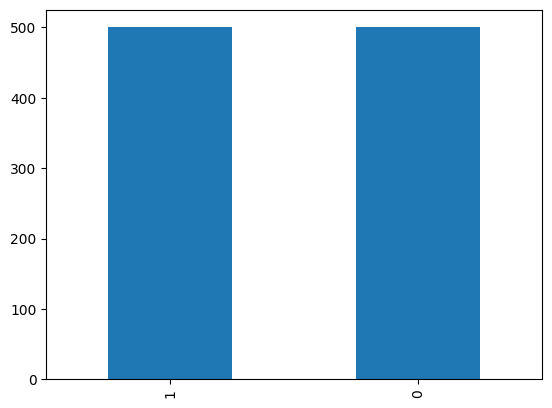

In [ ]:
# Столбчатая диаграмма
df['label'].value_counts().plot.bar()

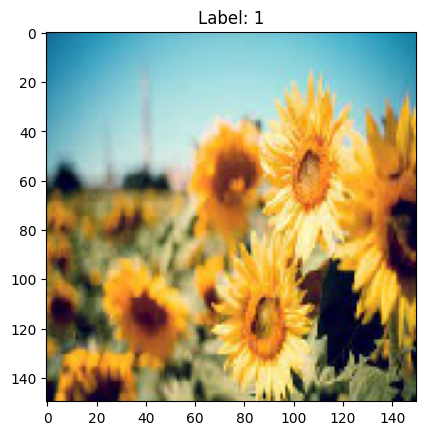

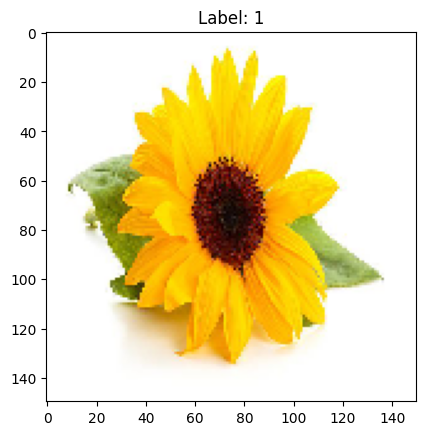

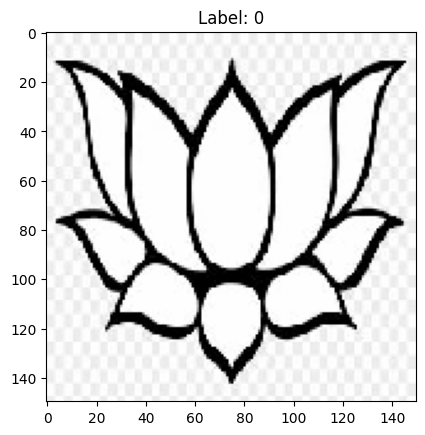

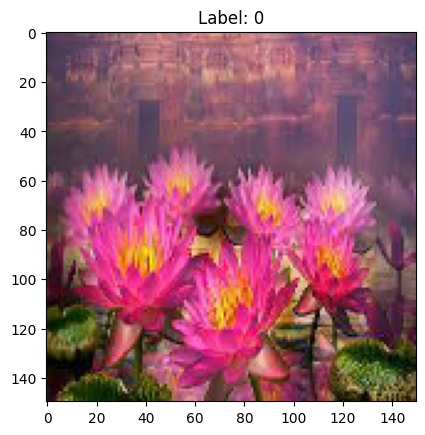

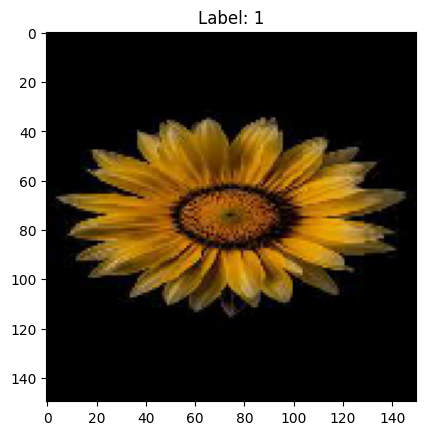

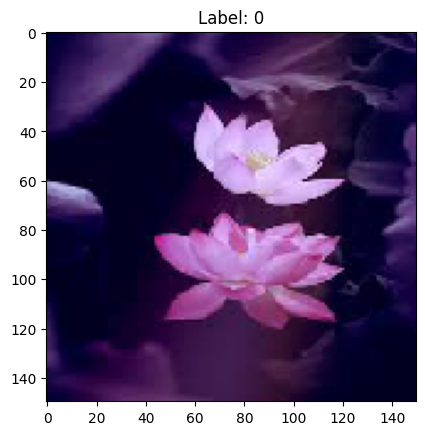

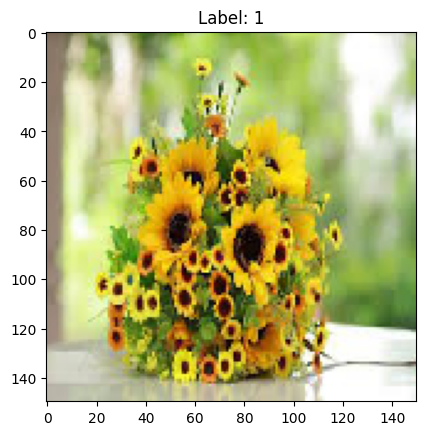

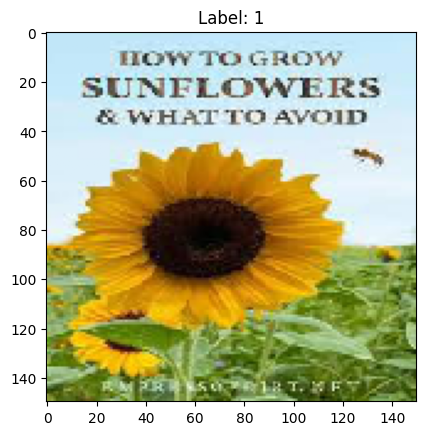

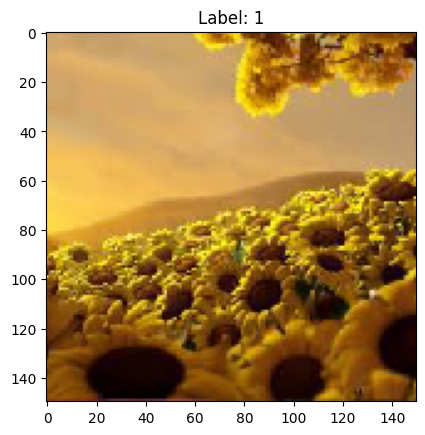

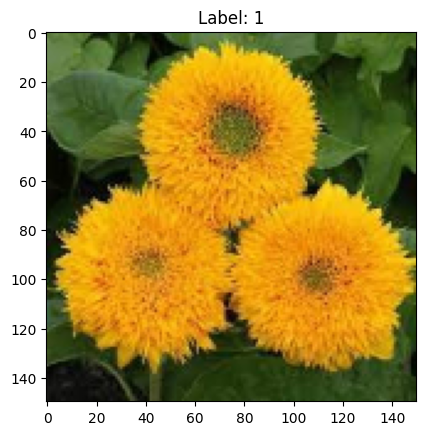

In [ ]:
for i in range(10):
    plt.imshow(images[i]/255.)
    plt.title('Label: {}'.format(categories[i]))
    plt.show()

## Обучающая и тестовая выборки

*Данный код разделяет данные на обучающую и тестовую выборки.*

In [ ]:
train_df, test_df, train_lab, test_lab = train_test_split(images, categories, test_size=0.2, random_state=42)

*Данный код выполняет нормализацию данных перед обучением модели машинного обучения.*

In [ ]:
train_df = train_df.astype('float32')
test_df = test_df.astype('float32')

train_df = train_df / 255.0
test_df = test_df / 255.0

*Преобразование категориальных меток в формат, который может быть использован для обучения модели.*

In [ ]:
train_lab = np_utils.to_categorical(train_lab)
test_lab = np_utils.to_categorical(test_lab)
class_num = test_lab.shape[1]

## Построение архитектуры нейронной сети

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

## Обучение нашей модели

In [ ]:
history = model.fit(train_df, train_lab, epochs=20, validation_data=(test_df, test_lab))

Epoch 1/20
25/25 [==============================] - 40s 2s/step - loss: 0.5170 - accuracy: 0.7312 - val_loss: 0.2292 - val_accuracy: 0.9150
Epoch 2/20
25/25 [==============================] - 37s 1s/step - loss: 0.1893 - accuracy: 0.9450 - val_loss: 0.1375 - val_accuracy: 0.9700
Epoch 3/20
25/25 [==============================] - 37s 1s/step - loss: 0.1265 - accuracy: 0.9625 - val_loss: 0.0900 - val_accuracy: 0.9850
Epoch 4/20
25/25 [==============================] - 35s 1s/step - loss: 0.0793 - accuracy: 0.9787 - val_loss: 0.0926 - val_accuracy: 0.9600
Epoch 5/20
25/25 [==============================] - 38s 2s/step - loss: 0.0819 - accuracy: 0.9800 - val_loss: 0.1048 - val_accuracy: 0.9800
Epoch 6/20
25/25 [==============================] - 36s 1s/step - loss: 0.0615 - accuracy: 0.9850 - val_loss: 0.1089 - val_accuracy: 0.9600
Epoch 7/20
25/25 [==============================] - 38s 2s/step - loss: 0.0494 - accuracy: 0.9900 - val_loss: 0.0614 - val_accuracy: 0.9900
Epoch 8/20
25/25 [==

*Оценка точности модели машинного обучения на тестовых данных.*

In [ ]:
test_loss, test_accuracy = model.evaluate(test_df, test_lab)
print('Test accuracy:', test_accuracy)

7/7 [==============================] - 2s 293ms/step - loss: 0.1381 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


*Строим график функции потерь модели на обучающей и тестовой выборках.*

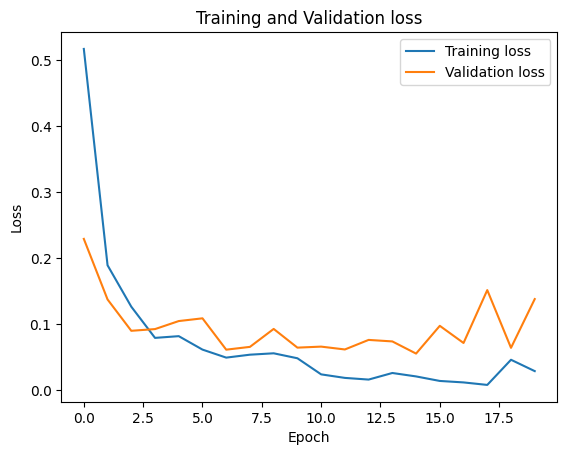

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Строим график точности модели на обучающей и тестовой выборках.*

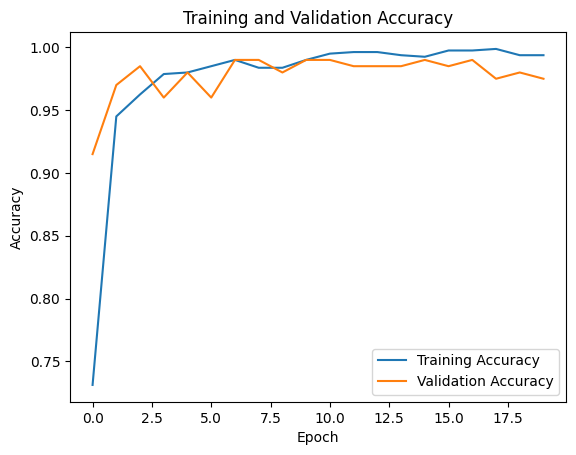

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Тестирование модели

*Распознаем и предсказываем изображение подсолнуха.*

In [ ]:
img_path = '/content/drive/MyDrive/Sunflower.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [ ]:
predict = model.predict(img_tensor)

1/1 [==============================] - 0s 499ms/step


In [ ]:
predict

array([[9.0776695e-07, 9.9999911e-01]], dtype=float32)

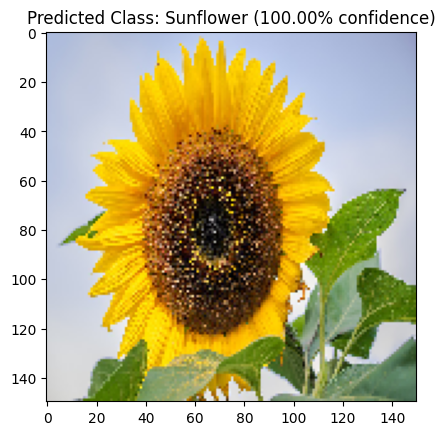

In [ ]:
num_class = np.argmax(predict[0])
names_class = ['Lotos', 'Sunflower']
name_class = names_class[num_class]
confidence = predict[0][num_class]

plt.imshow(img)
plt.title('Predicted Class: {} ({:.2f}% confidence)'.format(name_class, confidence*100))
plt.show()

*Распознаем и предсказываем изображение лотоса.*

In [ ]:
img_path = '/content/drive/MyDrive/Lotos.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [ ]:
predict = model.predict(img_tensor)

1/1 [==============================] - 0s 34ms/step


In [ ]:
predict

array([[9.9998945e-01, 1.7711731e-07]], dtype=float32)

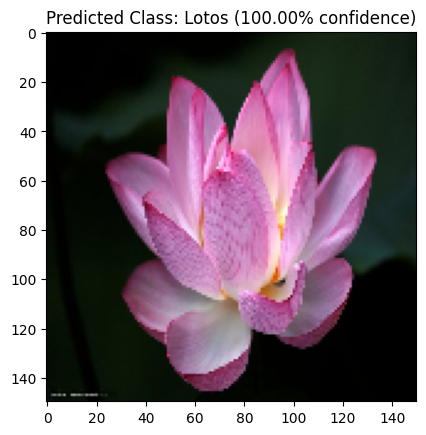

In [ ]:
num_class = np.argmax(predict[0])
names_class = ['Lotos', 'Sunflower']
name_class = names_class[num_class]
confidence = predict[0][num_class]

plt.imshow(img)
plt.title('Predicted Class: {} ({:.2f}% confidence)'.format(name_class, confidence*100))
plt.show()